In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("./../data/the_grammy_awards.csv")
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [28]:
print(f"Shape inicial: {df.shape}")
print("\nValores nulos iniciales:")
print(df.isnull().sum())

Shape inicial: (4810, 10)

Valores nulos iniciales:
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


In [ ]:
print("Filas con 'nominee' nulo:")
df[df['nominee'].isnull()]


Filas con 'nominee' nulo:


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2261,2000,43rd Annual GRAMMY Awards (2000),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,"Remixer of the Year, Non-Classical",NaN,NaN,NaN,NaN,True
2359,1999,42nd Annual GRAMMY Awards (1999),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
2454,1998,41st Annual GRAMMY Awards (1998),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,"Remixer Of The Year, Non-classical",NaN,NaN,NaN,NaN,True
2547,1997,40th Annual GRAMMY Awards (1997),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
4525,1965,8th Annual GRAMMY Awards (1965),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best New Country & Western Artist,NaN,NaN,NaN,NaN,True
4573,1964,7th Annual GRAMMY Awards (1964),2017-11-28T00:03:45-08:00,2019-09-10T01:06:11-07:00,Best New Country & Western Artist Of 1964,NaN,NaN,NaN,NaN,True


In [31]:
df.dropna(subset=['nominee'], inplace=True)
print(f"\nShape después de eliminar 'nominee' nulos: {df.shape}")


Shape después de eliminar 'nominee' nulos: (4804, 10)


In [32]:
print("\nCategorías comunes donde 'artist' es Nulo:")
print(df[df['artist'].isnull()]['category'].value_counts().head(10))


Categorías comunes donde 'artist' es Nulo:
category
Song Of The Year                  70
Best Opera Recording              64
Best Album Notes                  63
Best Instrumental Composition     55
Best Country Song                 55
Best New Artist                   50
Best Historical Album             44
Best Chamber Music Performance    43
Best Instrumental Arrangement     39
Best Orchestral Performance       36
Name: count, dtype: int64


In [33]:
condition = (df['category'] == 'Best New Artist') & (df['artist'].isnull())
df.loc[condition, 'artist'] = df.loc[condition, 'nominee']
print(f"\nValores nulos en 'artist' después de rellenar para Best New Artist: {df['artist'].isnull().sum()}")


Valores nulos en 'artist' después de rellenar para Best New Artist: 1784


In [34]:
cols_to_drop = ['img', 'published_at', 'updated_at', 'workers', 'title']
cols_exist = [col for col in cols_to_drop if col in df.columns]
if cols_exist:
    df.drop(columns=cols_exist, inplace=True)
    print(f"\nColumnas eliminadas: {cols_exist}")
    print(f"Nuevo shape: {df.shape}")


Columnas eliminadas: ['img', 'published_at', 'updated_at', 'workers', 'title']
Nuevo shape: (4804, 5)


In [35]:
num_duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Filas duplicadas eliminadas. Nuevo shape: {df.shape}")


Número de filas duplicadas: 0


In [36]:
df['category'] = df['category'].str.strip()
df['nominee'] = df['nominee'].str.strip()
df['artist'] = df['artist'].str.strip()

In [37]:
print("\nAnálisis Descriptivo Básico:")
print(f"Rango de años: {df['year'].min()} - {df['year'].max()}")
print(f"Número de categorías únicas: {df['category'].nunique()}")
print(f"Número de artistas únicos (aprox): {df['artist'].nunique()}") # Aprox por NaNs y variaciones
print(f"Número de nominados únicos (aprox): {df['nominee'].nunique()}")

print("\nDistribución Ganador vs Nominado:")
print(df['winner'].value_counts())
print(df['winner'].value_counts(normalize=True) * 100)

print("\nTop 10 Categorías más frecuentes:")
print(df['category'].value_counts().head(10))

print("\nTop 10 Artistas más nominados (ignorando NaNs):")
print(df['artist'].dropna().value_counts().head(10))


Análisis Descriptivo Básico:
Rango de años: 1958 - 2019
Número de categorías únicas: 633
Número de artistas únicos (aprox): 1677
Número de nominados únicos (aprox): 4131

Distribución Ganador vs Nominado:
winner
True    4804
Name: count, dtype: int64
winner
True    100.0
Name: proportion, dtype: float64

Top 10 Categorías más frecuentes:
category
Song Of The Year                  70
Record Of The Year                69
Album Of The Year                 66
Best Opera Recording              64
Best Album Notes                  63
Best Country Song                 55
Best Instrumental Composition     55
Best New Artist                   51
Best Historical Album             44
Best Chamber Music Performance    43
Name: count, dtype: int64

Top 10 Artistas más nominados (ignorando NaNs):
artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Bruce Springsteen    13
Stevie Wonder        13
Ella Fitzgerald      13
Beyoncé              13
Dixie Chicks         12
Tony B

C:\Users\USER\AppData\Local\Temp\ipykernel_22232\1477452688.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(tick_labels)


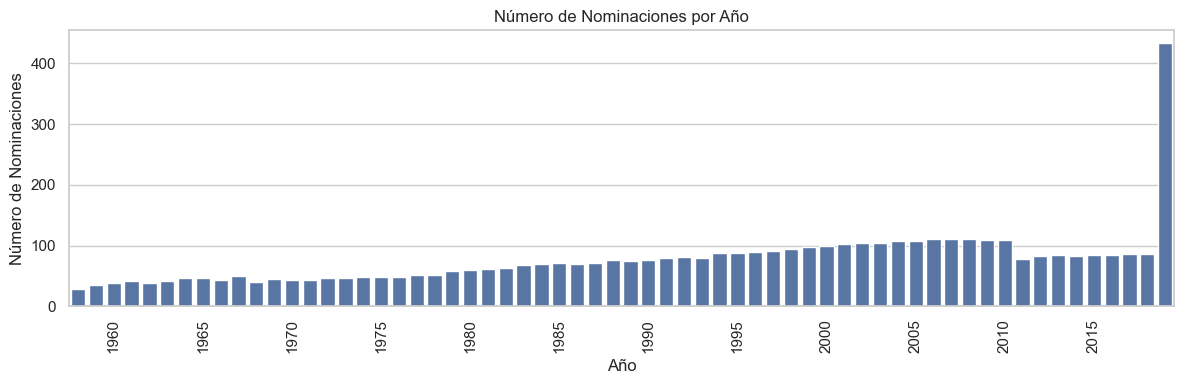

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='year')
plt.title('Número de Nominaciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Nominaciones')
plt.xticks(rotation=90)
tick_labels = [label if int(label.get_text()) % 5 == 0 else '' for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(tick_labels)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22232\1705352837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


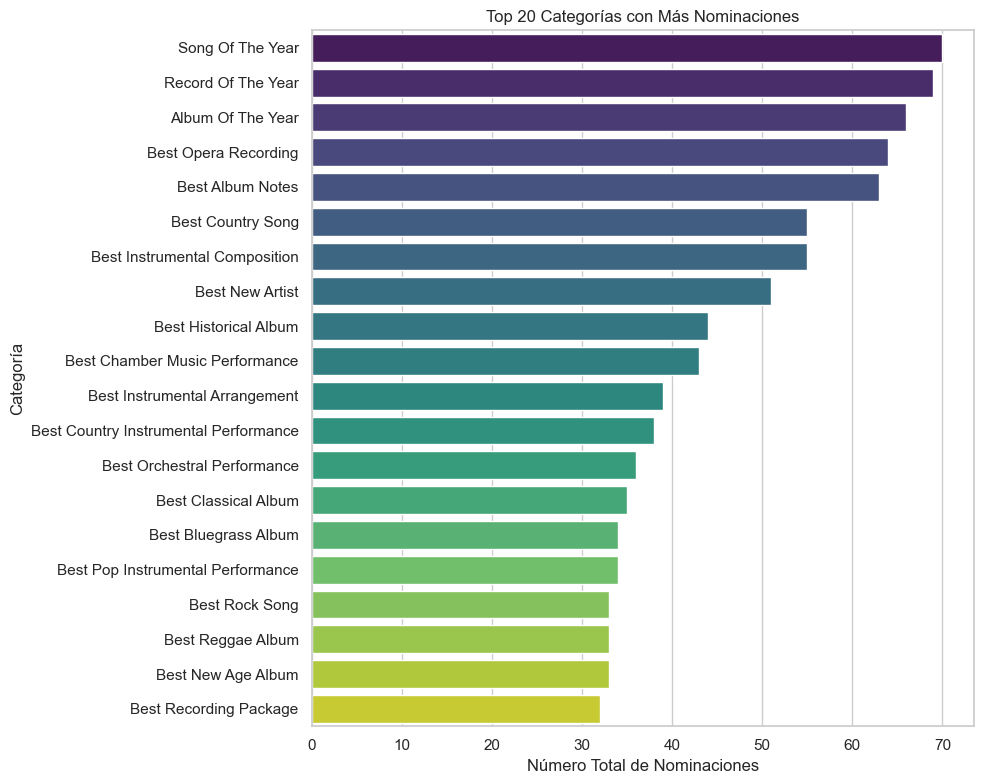

In [41]:
plt.figure(figsize=(10, 8))
top_categories = df['category'].value_counts().nlargest(20)
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
plt.title('Top 20 Categorías con Más Nominaciones')
plt.xlabel('Número Total de Nominaciones')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22232\2732357980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists_nominated.index, x=top_artists_nominated.values, palette="magma")


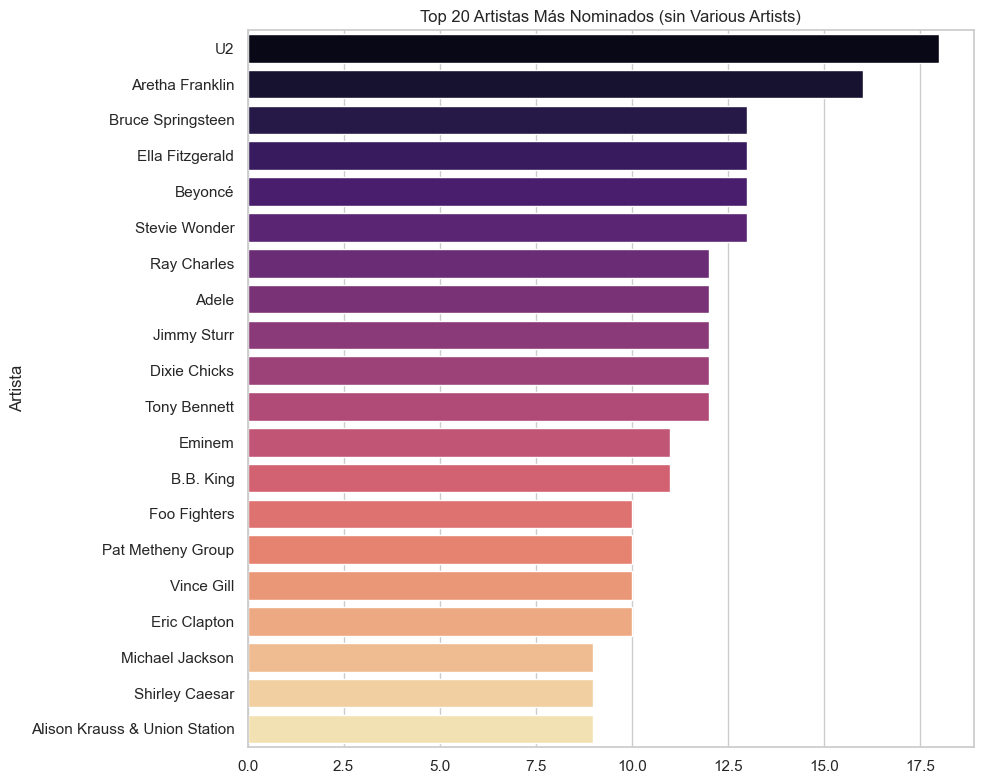

In [47]:
plt.figure(figsize=(10, 8))

top_artists_nominated = df['artist'].dropna()
top_artists_nominated = top_artists_nominated[top_artists_nominated != "(Various Artists)"]
top_artists_nominated = top_artists_nominated.value_counts().nlargest(20)

sns.barplot(y=top_artists_nominated.index, x=top_artists_nominated.values, palette="magma")
plt.title('Top 20 Artistas Más Nominados (sin Various Artists)')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22232\2748284786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists_winners.index, x=top_artists_winners.values, palette="magma")


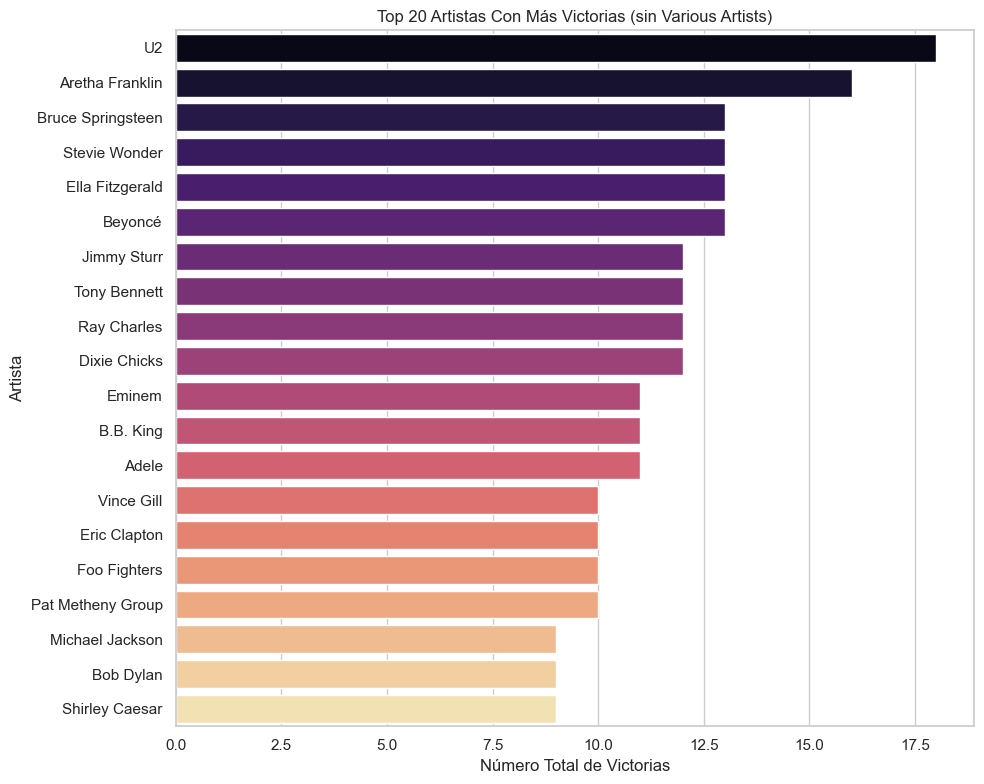

In [55]:
plt.figure(figsize=(10, 8))

top_artists_winners = df[(df['winner'] == True) & (df['artist'] != "(Various Artists)")]['artist'].dropna()
top_artists_winners = top_artists_winners.value_counts().nlargest(20)

sns.barplot(y=top_artists_winners.index, x=top_artists_winners.values, palette="magma")
plt.title('Top 20 Artistas Con Más Victorias (sin Various Artists)')
plt.xlabel('Número Total de Victorias')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

In [56]:
big_four_categories = [
    'Record Of The Year',
    'Album Of The Year',
    'Song Of The Year',
    'Best New Artist'
]

df_big_four = df[df['category'].isin(big_four_categories)].copy() # Usar .copy() para evitar SettingWithCopyWarning

print(f"\nAnálisis de las 'Big Four' Categorías ({len(df_big_four)} nominaciones):")

# Artistas más nominados en Big Four
print("\nTop 10 Artistas más nominados en Big Four:")
print(df_big_four['artist'].dropna().value_counts().head(10))


Análisis de las 'Big Four' Categorías (256 nominaciones):

Top 10 Artistas más nominados en Big Four:
artist
Adele                           4
Frank Sinatra                   4
U2                              4
Eric Clapton                    3
Paul Simon                      3
Simon And Garfunkel             3
Henry Mancini                   3
Stevie Wonder                   3
Robert Plant & Alison Krauss    2
Bon Iver                        2
Name: count, dtype: int64



Top 10 Artistas más ganadores en Big Four:
artist
Adele                           4
Frank Sinatra                   4
U2                              4
Eric Clapton                    3
Paul Simon                      3
Simon And Garfunkel             3
Henry Mancini                   3
Stevie Wonder                   3
Robert Plant & Alison Krauss    2
Bon Iver                        2
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22232\3246867846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_big_four, y='category', order=big_four_categories, palette='Set2')


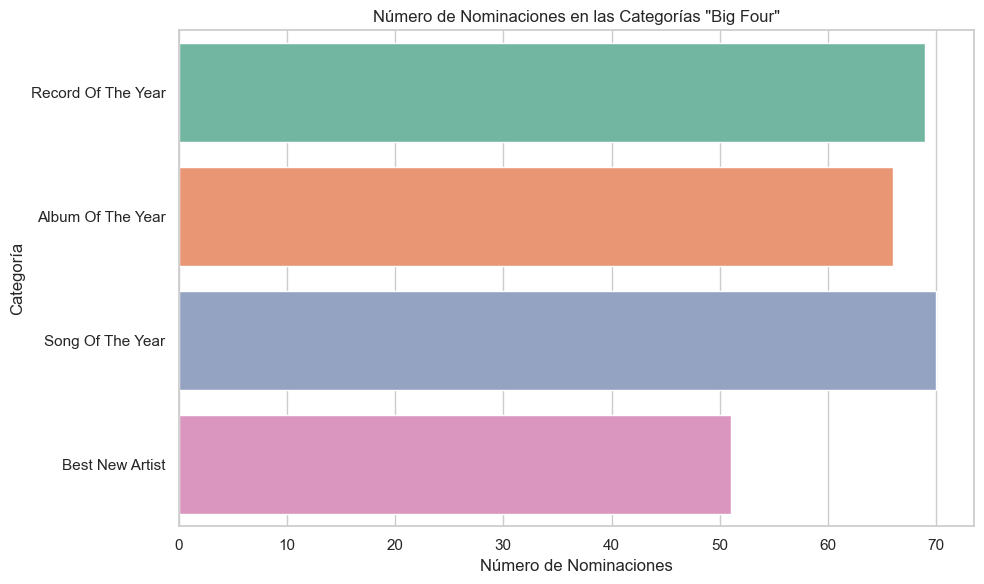

In [57]:
print("\nTop 10 Artistas más ganadores en Big Four:")
print(df_big_four[df_big_four['winner'] == True]['artist'].dropna().value_counts().head(10))

# Visualización de nominaciones en Big Four
plt.figure(figsize=(10, 6))
sns.countplot(data=df_big_four, y='category', order=big_four_categories, palette='Set2')
plt.title('Número de Nominaciones en las Categorías "Big Four"')
plt.xlabel('Número de Nominaciones')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22232\4235376865.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=win_rate_bf.index, x=win_rate_bf.values, palette='coolwarm')


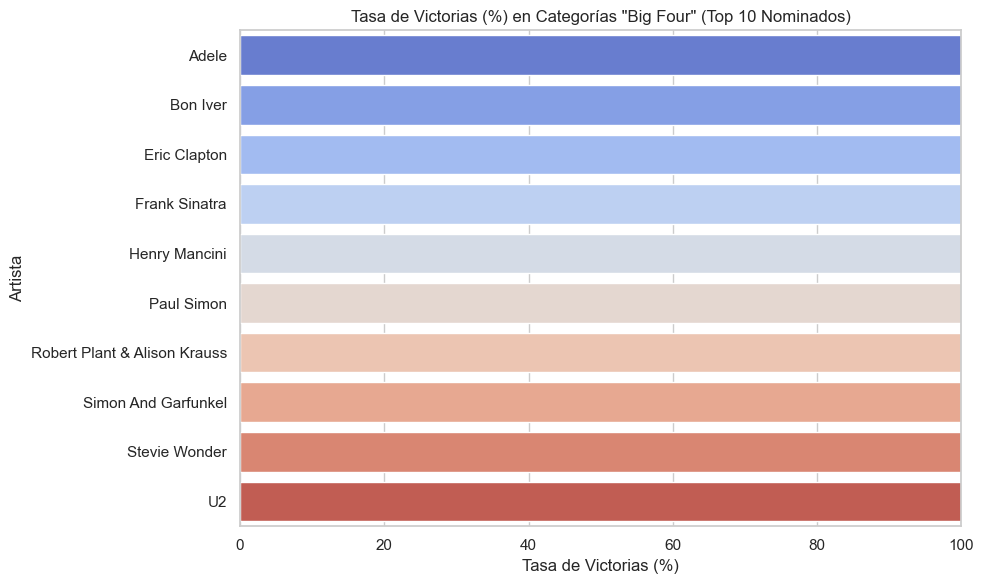

In [58]:
top_nominated_big_four = df_big_four['artist'].dropna().value_counts().head(10).index.tolist()
df_top_artists_bf = df_big_four[df_big_four['artist'].isin(top_nominated_big_four)]

win_rate_bf = df_top_artists_bf.groupby('artist')['winner'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(y=win_rate_bf.index, x=win_rate_bf.values, palette='coolwarm')
plt.title('Tasa de Victorias (%) en Categorías "Big Four" (Top 10 Nominados)')
plt.xlabel('Tasa de Victorias (%)')
plt.ylabel('Artista')
plt.xlim(0, 100) # Asegurar que la escala va de 0 a 100%
plt.tight_layout()
plt.show()